## konek gdrive

In [65]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
!ls /content/gdrive/MyDrive/ProductsImageDataset.zip

ls: cannot access '/content/gdrive/MyDrive/ProductsImageDataset.zip': No such file or directory


In [67]:
!unzip /content/gdrive/MyDrive/ProductsImageDataset.zip

unzip:  cannot find or open /content/gdrive/MyDrive/ProductsImageDataset.zip, /content/gdrive/MyDrive/ProductsImageDataset.zip.zip or /content/gdrive/MyDrive/ProductsImageDataset.zip.ZIP.


## menggunakan modul split folders

In [68]:
import tensorflow as tf
import os

In [69]:
!pip install split-folders

In [70]:
import splitfolders
base_dir = '/content/gdrive/MyDrive/ecommerce_products'

In [71]:
os.listdir(base_dir)

['jeans', 'sofa', 'tshirt', 'tv']

## membagi folder menggunakan split folder

In [72]:
splitfolders.ratio(base_dir, output='ecommerce_products',seed=42, ratio=(0.6,0.4))

Copying files: 796 files [00:01, 460.22 files/s]


## Menggunakan modul os untuk menggabungkan path direktori train dan validation dengan dataset 'ecommerce_products'

In [73]:

train_dir = os.path.join('ecommerce_products', 'train')
validation_dir = os.path.join('ecommerce_products', 'val')

In [74]:
tv_dir = os.path.join(base_dir,'tv')
tshirt_dir = os.path.join(base_dir,'tshirt')
sofa_dir = os.path.join(base_dir,'sofa')
jeans_dir = os.path.join(base_dir,'jeans')

## Mengimport modul ImageDataGenerator dari paket tensorflow.keras.preprocessing.image

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode ='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)


## Menggunakan metode flow_from_directory untuk memuat dan mengolah data latih dari direktori train_dir dan juga validasi dari direktori validation_dir

In [76]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 476 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


## Membuat model sequential untuk membangun arsitektur jaringan saraf konvolusi

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
import tensorflow as tf

class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.95:
            print("\nAkurasi mencapai 95%, menghentikan pelatihan.")
            self.model.stop_training = True
callback = AccuracyCallback()

In [81]:
!rm '/content/ecommerce_products/train/val'

rm: cannot remove '/content/ecommerce_products/train/val': No such file or directory


In [82]:
history = model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=35,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [callback]
      )

Epoch 1/35
35/35 [==============================] - 5s 72ms/step - loss: 1.7569 - accuracy: 0.3286 - val_loss: 1.0844 - val_accuracy: 0.5625
Epoch 2/35
35/35 [==============================] - 4s 114ms/step - loss: 1.0617 - accuracy: 0.5000 - val_loss: 1.3321 - val_accuracy: 0.5625
Epoch 3/35
35/35 [==============================] - 6s 173ms/step - loss: 1.1311 - accuracy: 0.5571 - val_loss: 0.6389 - val_accuracy: 0.7500
Epoch 4/35
35/35 [==============================] - 4s 127ms/step - loss: 0.8173 - accuracy: 0.6857 - val_loss: 0.6828 - val_accuracy: 0.8125
Epoch 5/35
35/35 [==============================] - 7s 188ms/step - loss: 0.7609 - accuracy: 0.7429 - val_loss: 0.3393 - val_accuracy: 1.0000
Epoch 6/35
35/35 [==============================] - 4s 98ms/step - loss: 0.6831 - accuracy: 0.7500 - val_loss: 1.1037 - val_accuracy: 0.5000
Epoch 7/35
35/35 [==============================] - 2s 64ms/step - loss: 0.7934 - accuracy: 0.7000 - val_loss: 0.3212 - val_accuracy: 0.9375
Epoch 8/3

## Mengevaluasi model dengan data test yang disediakan oleh train_generator


In [84]:
model.evaluate(train_generator)

119/119 [==============================] - 7s 61ms/step - loss: 0.1592 - accuracy: 0.9412


[0.1591663956642151, 0.9411764740943909]

## Grafik Loss And Accuracy

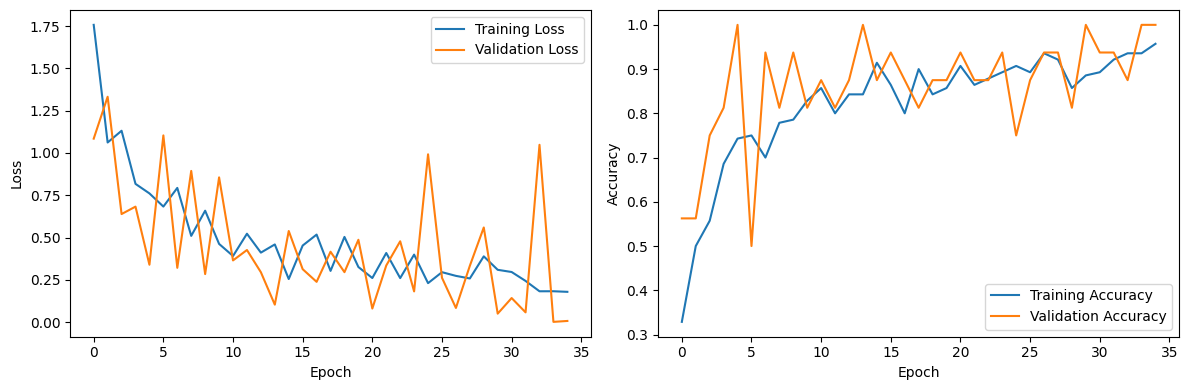

In [85]:
import matplotlib.pyplot as plt
# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()